In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import seaborn as sb
import random
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_selector as selector
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

In [36]:
houses_df = pd.read_csv('train.csv')

houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
houses_df = houses_df[houses_df["SalePrice"] < 700000]
houses_df = houses_df[houses_df["LotArea"] < 100000]

In [38]:
houses_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1454.000000,1454.000000,1198.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1446.000000,1454.000000,...,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000
mean,731.119670,56.856946,69.879800,10084.839752,6.093535,5.574966,1971.253095,1984.852132,102.737206,440.001376,...,93.530949,46.664374,22.044704,3.423659,15.123109,2.388583,42.843191,6.324622,2007.817056,179822.555708
std,421.854142,42.220998,24.044457,5642.853408,1.377551,1.114050,30.249466,20.658752,178.815004,452.716016,...,124.163458,66.351284,61.228893,29.376979,55.864001,37.560994,496.697866,2.705145,1.329774,76460.500441
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,367.250000,20.000000,59.000000,7536.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,732.500000,50.000000,69.000000,9458.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,380.500000,...,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162900.000000
75%,1095.750000,70.000000,80.000000,11546.250000,7.000000,6.000000,2000.750000,2004.000000,164.750000,706.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213430.000000
max,1460.000000,190.000000,313.000000,70761.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,625000.000000


In [39]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(houses_df)

# removal = ['Id', 'SalePrice', 'OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch']
print(numerical_columns)
categorical_columns = categorical_columns_selector(houses_df)
print(categorical_columns)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Gara

In [40]:
null_counts = houses_df.isnull().sum()
# print(null_counts)
null_counts = null_counts[null_counts > 0]
print(null_counts)

LotFrontage      256
Alley           1363
MasVnrType       869
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1448
Fence           1174
MiscFeature     1402
dtype: int64


In [41]:
nulls = []
for i in null_counts.index:
    print(i)
    houses_df = houses_df.apply(pd.to_numeric, errors='coerce')
    houses_df = houses_df.fillna(0)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [42]:
houses_df = pd.read_csv('train.csv', encoding='latin1')

for i in null_counts.index:
    houses_df = houses_df.apply(pd.to_numeric, errors='coerce')
    houses_df = houses_df.fillna(0)

# # Define the number of categories
# num_categories = 3

# category_names = ['Economica', 'Intermedia', 'Cara']

# houses_df['Precio_Categoria'] = pd.qcut(houses_df['SalePrice'], q=num_categories, labels=category_names)

# Identificar puntos de corte significativos (ejemplo hipotético)
primer_cuartil = houses_df['SalePrice'].quantile(0.25)
segundo_cuartil = houses_df['SalePrice'].quantile(0.5)
tercer_cuartil = houses_df['SalePrice'].quantile(0.75)

# Crear la variable respuesta
def categorizar_precio(precio):
    if precio <= primer_cuartil:
        return 'Economica'
    elif precio <= segundo_cuartil:
        return 'Intermedia'
    else:
        return 'Cara'

houses_df['Precio_Categoria'] = houses_df['SalePrice'].apply(categorizar_precio)

dummies = pd.get_dummies(houses_df['Precio_Categoria'])

houses_df = pd.concat([houses_df, dummies], axis=1)

print(houses_df[['Economica', 'Intermedia', 'Cara']])
print("Economica: ", houses_df['Economica'].value_counts()[1])
print("Intermedia: ", houses_df['Intermedia'].value_counts()[1])
print("Cara: ", houses_df['Cara'].value_counts()[1])

      Economica  Intermedia   Cara
0         False       False   True
1         False       False   True
2         False       False   True
3         False        True  False
4         False       False   True
...         ...         ...    ...
1455      False       False   True
1456      False       False   True
1457      False       False   True
1458      False        True  False
1459      False        True  False

[1460 rows x 3 columns]
Economica:  365
Intermedia:  367
Cara:  728


C:\Users\Personal\AppData\Local\Temp\ipykernel_1752\4086763387.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Economica: ", houses_df['Economica'].value_counts()[1])
C:\Users\Personal\AppData\Local\Temp\ipykernel_1752\4086763387.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Intermedia: ", houses_df['Intermedia'].value_counts()[1])
C:\Users\Personal\AppData\Local\Temp\ipykernel_1752\4086763387.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

In [43]:
houses_df.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,...,1460.000000,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.000000
mean,730.500000,56.897260,0.0,57.623288,10516.828082,0.0,0.0,0.0,0.0,0.0,...,2.758904,0.0,0.0,0.0,43.489041,6.321918,2007.815753,0.0,0.0,180921.195890
std,421.610009,42.300571,0.0,34.664304,9981.264932,0.0,0.0,0.0,0.0,0.0,...,40.177307,0.0,0.0,0.0,496.123024,2.703626,1.328095,0.0,0.0,79442.502883
min,1.000000,20.000000,0.0,0.000000,1300.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,1.000000,2006.000000,0.0,0.0,34900.000000
25%,365.750000,20.000000,0.0,42.000000,7553.500000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,5.000000,2007.000000,0.0,0.0,129975.000000
50%,730.500000,50.000000,0.0,63.000000,9478.500000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,6.000000,2008.000000,0.0,0.0,163000.000000
75%,1095.250000,70.000000,0.0,79.000000,11601.500000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,8.000000,2009.000000,0.0,0.0,214000.000000
max,1460.000000,190.000000,0.0,313.000000,215245.000000,0.0,0.0,0.0,0.0,0.0,...,738.000000,0.0,0.0,0.0,15500.000000,12.000000,2010.000000,0.0,0.0,755000.000000


In [44]:
# lista = {}
# for column in houses_df.columns:
#     zero_count = (houses_df[column] == 0).sum()
#     if zero_count > 1450:
#         lista[column] = zero_count

# for lis in lista:
#     print(lis, lista[lis])

# for lis in lista:
#     houses_df = houses_df.drop(lis, axis=1)

In [45]:
y = houses_df.pop("Cara")
X = houses_df
X.drop(["Economica", "Intermedia", "Precio_Categoria"], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [46]:
X[numerical_columns].value_counts()

Id    MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice
1     60          65.0         8450     7            5            2003       2003          196.0       706         0           150        856          856       854       0             1710       1             0             2         1         3             1             8             0           2003.0       2           548         0           61           0              0          0            0         0        2       2008    208500       1
982   60          98.0         12203    8            5            1998       1999          975.0       854 

Prueba de Regresión Logística con todas las variables numéricas, sin análisis de variables previo

In [47]:
logReg = LogisticRegression(solver='liblinear')
result = logReg.fit(X_train[numerical_columns],y_train)
X_train[numerical_columns]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
157,158,60,92.0,12003,8,5,2009,2010,84.0,0,...,0,75,0,0,0,0,0,5,2010,269500
886,887,90,70.0,8393,5,5,1959,2005,122.0,528,...,272,54,0,0,0,0,0,6,2006,145000
1051,1052,20,103.0,11175,7,5,2007,2007,0.0,0,...,0,20,0,0,0,0,0,10,2007,200141
593,594,120,0.0,4435,6,5,2003,2003,170.0,685,...,140,0,0,0,0,0,0,5,2009,140000
278,279,20,107.0,14450,9,5,2006,2007,315.0,0,...,124,98,0,0,142,0,0,5,2007,415298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,1443,60,85.0,11003,10,5,2008,2008,160.0,765,...,168,52,0,0,0,0,0,4,2009,310000
386,387,50,58.0,8410,5,3,1910,1996,0.0,0,...,0,151,0,0,0,0,0,5,2006,81000
131,132,60,0.0,12224,6,5,2000,2000,40.0,695,...,24,48,0,0,0,0,0,7,2009,244000
325,326,45,50.0,5000,5,6,1941,1950,0.0,116,...,0,0,244,0,0,0,0,12,2007,87000


In [48]:
y_pred = logReg.predict(X_train[numerical_columns])
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logReg.score(X_test[numerical_columns], y_test)))

Accuracy of logistic regression classifier on test set: 0.99


Se puede ver una precisión demasiado alta, por lo que debe de haber overfitting o correlación entre algunas variables

In [49]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logReg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [50]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.992922 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.992009 (0.007520) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.991096 (0.007534) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.989726 (0.008248) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.992009 (0.007520) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.990868 (0.007776) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.989726 (0.008248) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.992009 (0.007092) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.990639 (0.007603) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.989726 (0.008056) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.992922 (0.007603) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.990639 (0.008004) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.989726 (0.008248) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.992922 (0.007603) wit

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       512
        True       1.00      1.00      1.00       509

    accuracy                           1.00      1021
   macro avg       1.00      1.00      1.00      1021
weighted avg       1.00      1.00      1.00      1021



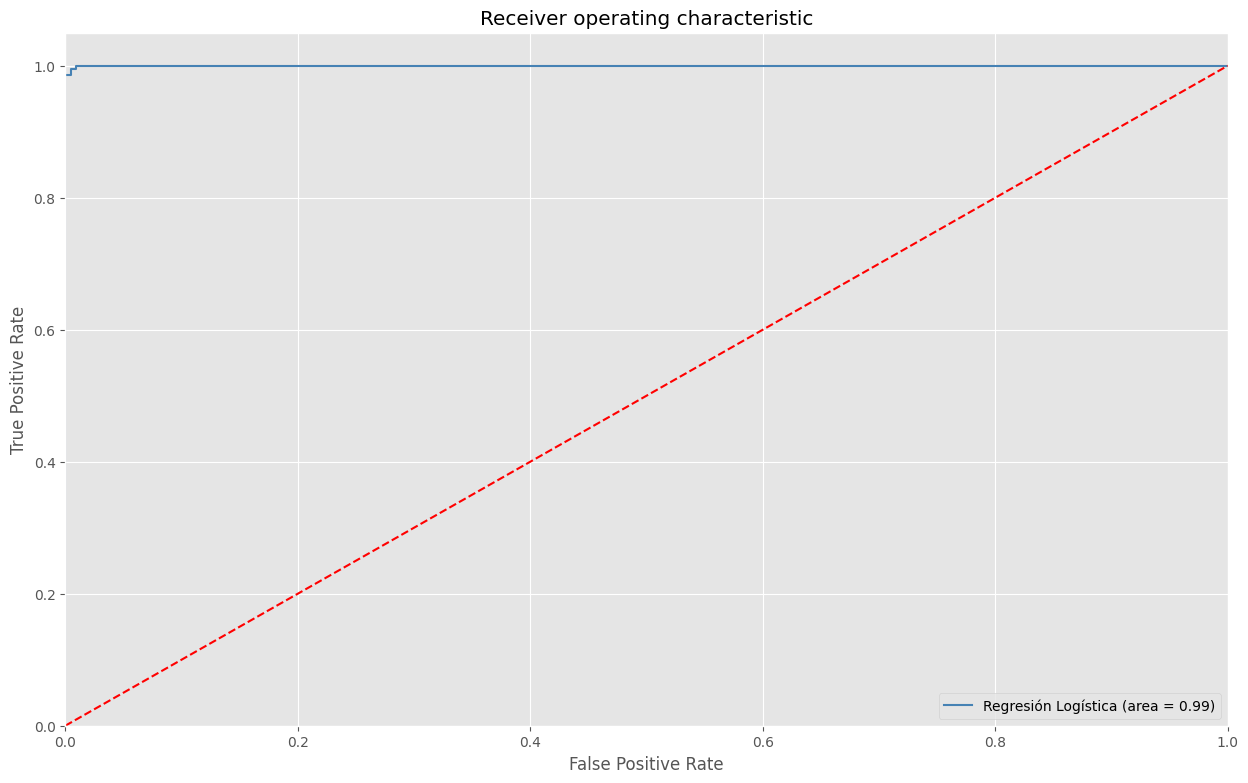

In [51]:
ypred = grid_search.predict(X_test)
print(classification_report(y_train,y_pred))

logit_roc_auc = roc_auc_score(y_test, logReg.predict(X_test[numerical_columns]))
fpr, tpr, thresholds = roc_curve(y_test, logReg.predict_proba(X_test[numerical_columns])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regresión Logística (area = %0.2f)' % logit_roc_auc, color="steelblue")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

La gráfica nos muestra que si existe un overfitting, por lo que debemos de realizar un análisis en nuestras variables

Vamos verificar si existe multicolinealidad entre nuestras variables y si existe cualquier tipo de correlación entre los diferentes campos, para ello podemos usar un mapa de correlación y el Factor de Inflación de la Varianza (FIV) para ello. 

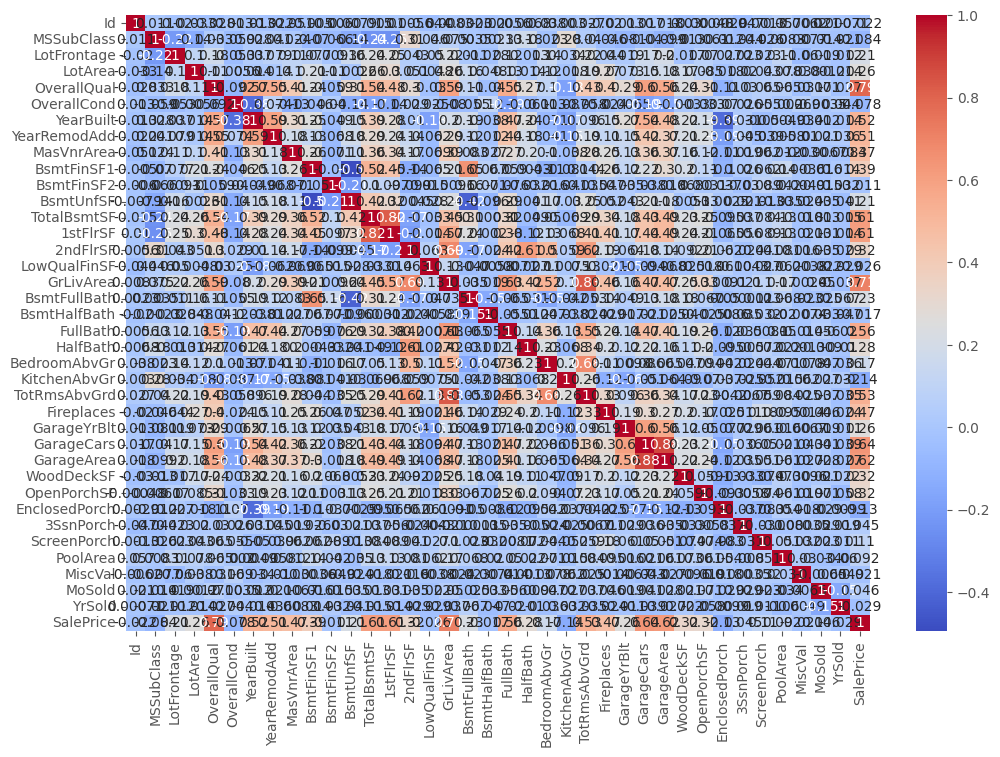

In [52]:
# Calcula la matriz de correlación
correlation_matrix = houses_df[numerical_columns].corr()

# Visualiza la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [53]:
# Supongamos que correlation_matrix es tu matriz de correlación
high_corr_threshold = 0.6  # Define your own threshold here

# Create a mask to ignore self-
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Apply the mask to the correlation matrix
corr_masked = correlation_matrix.mask(mask)

# Find pairs with correlation greater than the threshold
high_corr_pairs = [(column, row) for column in corr_masked.columns for row in corr_masked.index if abs(corr_masked[column][row]) > high_corr_threshold]

print(high_corr_pairs)
removal = []
for pair in high_corr_pairs:
    if pair[0] not in removal:
        removal.append(pair[0])
    if pair[1] not in removal:
        removal.append(pair[1])

[('OverallQual', 'GarageCars'), ('OverallQual', 'SalePrice'), ('BsmtFinSF1', 'BsmtFullBath'), ('TotalBsmtSF', '1stFlrSF'), ('TotalBsmtSF', 'SalePrice'), ('1stFlrSF', 'SalePrice'), ('2ndFlrSF', 'GrLivArea'), ('2ndFlrSF', 'HalfBath'), ('2ndFlrSF', 'TotRmsAbvGrd'), ('GrLivArea', 'FullBath'), ('GrLivArea', 'TotRmsAbvGrd'), ('GrLivArea', 'SalePrice'), ('BedroomAbvGr', 'TotRmsAbvGrd'), ('GarageCars', 'GarageArea'), ('GarageCars', 'SalePrice'), ('GarageArea', 'SalePrice')]


Aquí podemos ver que tenemos algunas cuantas variables las cuales muestran una alta correlación entre ellas.

In [54]:
# Asegúrate de que solo estás utilizando variables numéricas
df_numeric = houses_df[numerical_columns]

# Agrega una constante a tus variables (esto es necesario para el cálculo del VIF)
df_numeric['const'] = 1

# Calcula el VIF para cada variable
vif = pd.DataFrame()
vif["variables"] = df_numeric.columns
vif["VIF"] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]

for i in vif.index:
    if vif.loc[i]['VIF'] > 5:
        print(vif.loc[i]['variables']+": ", vif.loc[i]['VIF'])
        if vif.loc[i]['variables'] not in removal:
            removal.append(vif.loc[i]['variables'])
    
removal.remove('const')

for i in removal:
    numerical_columns.remove(i)

print(removal)

C:\Users\Personal\AppData\Local\Temp\ipykernel_1752\1954559068.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['const'] = 1
C:\Users\Personal\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


BsmtFinSF1:  inf
BsmtFinSF2:  inf
BsmtUnfSF:  inf
TotalBsmtSF:  inf
1stFlrSF:  inf
2ndFlrSF:  inf
LowQualFinSF:  inf
GrLivArea:  inf
GarageCars:  6.190077069394094
GarageArea:  5.305256667984693
SalePrice:  5.447440957136845
const:  2413266.255862993
['OverallQual', 'GarageCars', 'SalePrice', 'BsmtFinSF1', 'BsmtFullBath', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'HalfBath', 'TotRmsAbvGrd', 'FullBath', 'BedroomAbvGr', 'GarageArea', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF']


Al verificar la multicolinealidad, podemos observar que existen alrededor de 11 variables que exceden de la medida de 5, demostrando que si poseen una alta multicolinealidad. Por lo que las removemos de nuestro set de datos y volvemos a probar el modelo.

In [55]:
logReg = LogisticRegression(solver='liblinear')
result = logReg.fit(X_train[numerical_columns],y_train)
X_train[numerical_columns]

,Id,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtHalfBath,KitchenAbvGr,...,GarageYrBlt,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
157,158,60,92.0,12003,5,2009,2010,84.0,0,1,...,2009.0,0,75,0,0,0,0,0,5,2010
886,887,90,70.0,8393,5,1959,2005,122.0,0,2,...,2005.0,272,54,0,0,0,0,0,6,2006
1051,1052,20,103.0,11175,5,2007,2007,0.0,0,1,...,2007.0,0,20,0,0,0,0,0,10,2007
593,594,120,0.0,4435,5,2003,2003,170.0,0,1,...,2003.0,140,0,0,0,0,0,0,5,2009
278,279,20,107.0,14450,5,2006,2007,315.0,0,1,...,2007.0,124,98,0,0,142,0,0,5,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,1443,60,85.0,11003,5,2008,2008,160.0,0,1,...,2008.0,168,52,0,0,0,0,0,4,2009
386,387,50,58.0,8410,3,1910,1996,0.0,0,1,...,0.0,0,151,0,0,0,0,0,5,2006
131,132,60,0.0,12224,5,2000,2000,40.0,0,1,...,2000.0,24,48,0,0,0,0,0,7,2009
325,326,45,50.0,5000,6,1941,1950,0.0,0,1,...,1941.0,0,0,244,0,0,0,0,12,2007


In [56]:
y_pred = logReg.predict(X_train[numerical_columns])
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logReg.score(X_test[numerical_columns], y_test)))

Accuracy of logistic regression classifier on test set: 0.87


Podemos ver que se ve una mejora, ya que no se ve que el modelo tenga overfitting.

In [57]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logReg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [58]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.992922 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.992009 (0.007520) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.991096 (0.007534) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.989726 (0.008248) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.992009 (0.007520) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.990868 (0.007776) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.989726 (0.008248) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.992009 (0.007092) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.990639 (0.007603) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.989726 (0.008056) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.992922 (0.007603) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.990639 (0.008004) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.989726 (0.008248) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.992922 (0.007603) wit

              precision    recall  f1-score   support

       False       0.86      0.84      0.85       512
        True       0.84      0.86      0.85       509

    accuracy                           0.85      1021
   macro avg       0.85      0.85      0.85      1021
weighted avg       0.85      0.85      0.85      1021



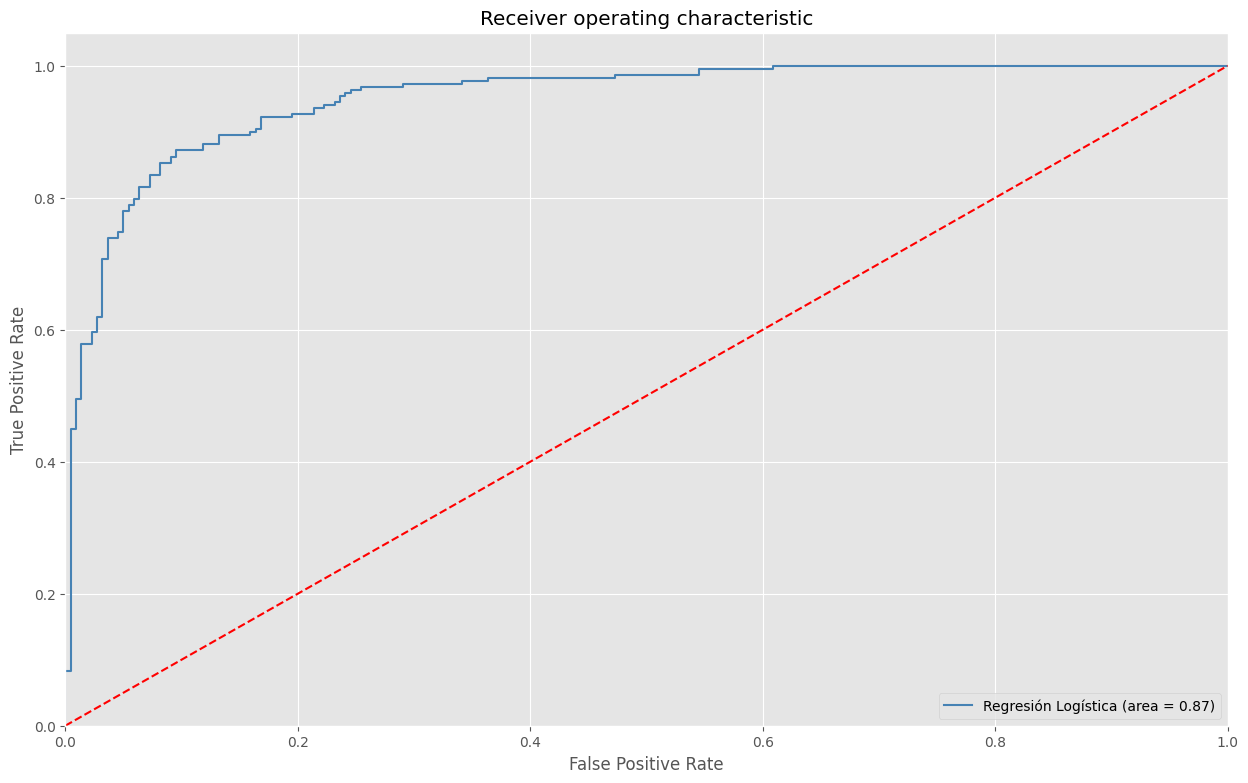

In [59]:
ypred = grid_search.predict(X_test)
print(classification_report(y_train,y_pred))

logit_roc_auc = roc_auc_score(y_test, logReg.predict(X_test[numerical_columns]))
fpr, tpr, thresholds = roc_curve(y_test, logReg.predict_proba(X_test[numerical_columns])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regresión Logística (area = %0.2f)' % logit_roc_auc, color="steelblue")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Y al comprobar con validación cruzada se ve un resultado más realista, y bastante bueno

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

# Crear y entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

#  hacer predicciones
y_pred = model.predict(X_test)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Imprimir las métricas
print('Accuracy:', accuracy)
print('Recall:', recall)
print('F1-score:', f1)
print('ROC AUC:', roc_auc)

Accuracy: 0.9908675799086758
Recall: 0.9862385321100917
F1-score: 0.9907834101382489
ROC AUC: 0.9908465387823187


C:\Users\Personal\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\Personal\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Personal\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

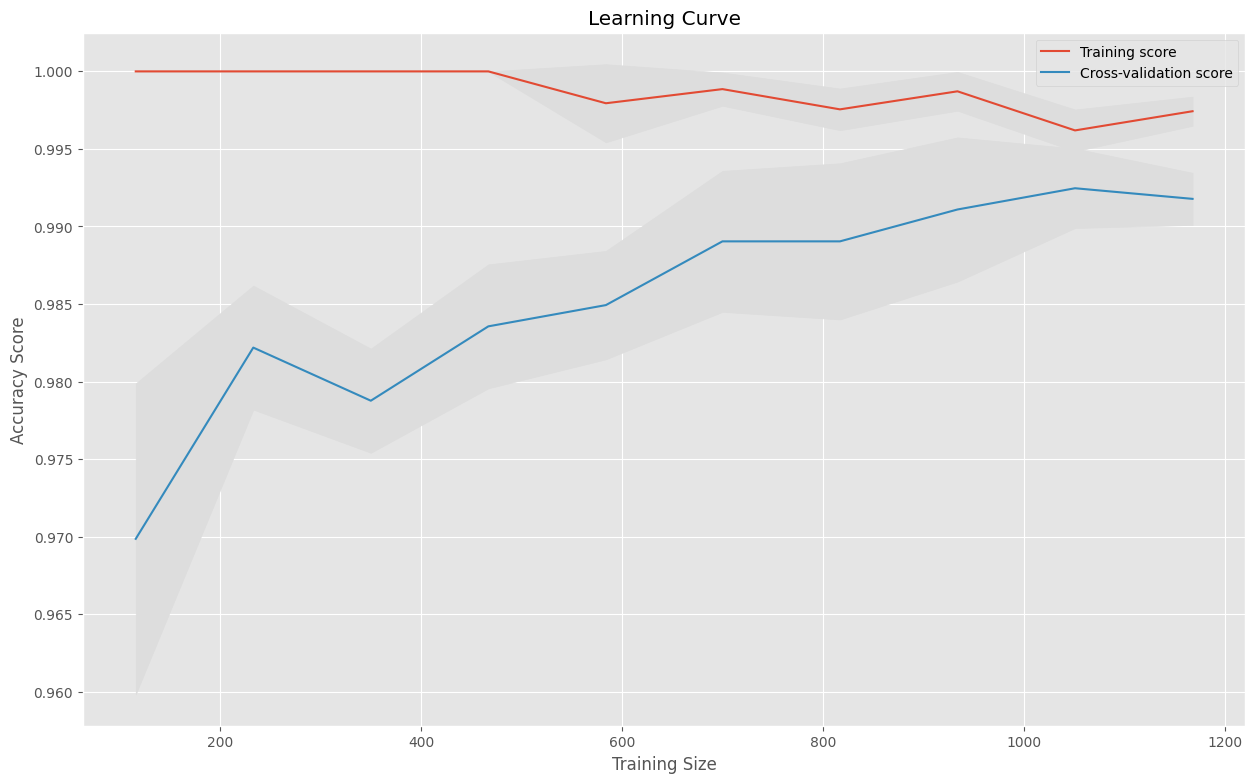

In [61]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Crear rangos de tamaños de entrenamiento
train_sizes = np.linspace(0.1, 1.0, 10)

# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes, cv=5)

# Calcular las medias y desviaciones estándar de los puntajes de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Dibujar las curvas de aprendizaje
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

# Crear la leyenda y los títulos
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')

# Mostrar la gráfica
plt.show()